# Analysis

What does total healthcare spending look like from 2002 to 2020 when sorted by sex, by age group, and lastly by sex and age group?

    Based on the line charts created in our analysis, we can see that spending for females consistently outpaced males from 2002 to 2020. Total healthcare spending for Females went from $778,215 millions in 2002 to $1,818,581 millions in 2020, while spending from Males went from $587,266 millions to $1,548,394 millions. 

    The highest healthcare spending occurred in the 45-64 age group throughout all the years, but the 65-84 age group is encroaching on this spending as of 2020. The lowest healthcare spending is within the 85+ plus age group, probably due to the smaller size of this population as individuals pass.

    Lastly, when we look at spending per sex and age group for females, the spending between the three age groups (45-64, 65-84, & 19-44) is pretty similar, with some fluctuations over the years. In 2002, the 65-84 age group was just over the other two and then dipped in the middle from 2006 to 2018, then shot up in 2020 (most likely due to COVID-19 spending per CMS). The 0-18 and 85+ show the lowest spending across all of the years, with under $156,000 millions each in 2020.

    Spending per sex and age group for males follows a similar pattern between age groups, with the 45-64 age group showing the highest expenditure and the 85+ age group the lowest. Unlike health care spending for females, spending for males across age groups does not intertwine over the years; all age groups continuously increase at similar rates. The 65-84 group is showing a spike in 2020, like female spending, but it does not surpass the 45-64 group as female expenditure does.

What is the breakdown of spending per service? What does healthcare spending look like for specific services? We looked closer at spending for Debtal Services and  Prescription Drugs.

    Looking at the chart for Average Spending, Hospital Care is by far the highest spending category on average. Between the years 2002-2020, it averaged almost 37% of all healthcare spending across all payer sources. The next highest category was Physician and Clinical Services, accounting for almost 25% of all spending. Together, the top 3 highest spending categories (adding in Prescription Drugs) averaged $1.6 billion (72.4% of all healthcare spending). 

    Dental Services spending shows quite a large change in services per age group. Looking at spending year over year per age group, people in groups 65-84 and 0-18 saw the largest increases in dental spending. Contrary to that, the age group of indiviuals who are 85+ spent not only the least amount of money on Dental Services, but also saw the smallest increase in spending from 2002-2020.

    Looking at Prescription Drug spending, we see increases in spending every year, more than doubling in average spending from 2002 to 2020. Spending on prescription drugs per gender appears realatively even, although females do 

What trends and estimates can we make from total spending by using regression charts?

# Opening and Reading

In [5]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [6]:
# First we have to pull in our CSV file containing all of our data
# Importing the health data CSV file
raw_data_df = os.path.join ('.' , 'Datasets' , 'age_and_sex_IP.csv')
raw_data_df = pd.read_csv(raw_data_df)
raw_data_df.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


# Total Spending by Sex

In [8]:
# Filtering the healthcare data to total spending by payer, service, and age group.
health_data_clean = raw_data_df[(raw_data_df["Payer"]== "Total") & (raw_data_df["Service"]== "Total Personal Health Care") & (raw_data_df["Age Group"]== "Total")]
health_data_clean.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1140,Total,Total Personal Health Care,Total,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Total,Total Personal Health Care,Total,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [9]:
# Filtering the healthcare data to get the total spending values by sex 
health_data_sex = health_data_clean[health_data_clean["Sex"]!= "Total"]
health_data_sex.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1140,Total,Total Personal Health Care,Total,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Total,Total Personal Health Care,Total,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [10]:
# Reducing the datafram information to only include sex and healthcare spending data per year
reduced_health_data_sex = health_data_sex.loc[:,["Sex", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
reduced_health_data_sex

,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1140,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [11]:
# Resetting the index of the dataframe to sex in order to create a line graph
sex_index = reduced_health_data_sex.set_index("Sex")
sex_index 

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Sex,,,,,,,,,,
Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [12]:
# Flipping the dataframe data in order to create a line graph for total spending by sex over the years
flip_sex_index = sex_index.T
flip_sex_index 

Sex,Males,Females
2002,587266,778215
2004,680026,902354
2006,783910,1022542
2008,872613,1134540
2010,965308,1215153
2012,1050368,1295834
2014,1136102,1390984
2016,1246245,1549313
2018,1354777,1664992
2020,1548394,1818581


In [13]:
print(flip_sex_index.loc[["2002"], "Males"])
print(flip_sex_index.loc[["2020"], "Males"])

print(flip_sex_index.loc[["2002"], "Females"])
print(flip_sex_index.loc[["2020"], "Females"])

2002    587266
Name: Males, dtype: int64
2020    1548394
Name: Males, dtype: int64
2002    778215
Name: Females, dtype: int64
2020    1818581
Name: Females, dtype: int64


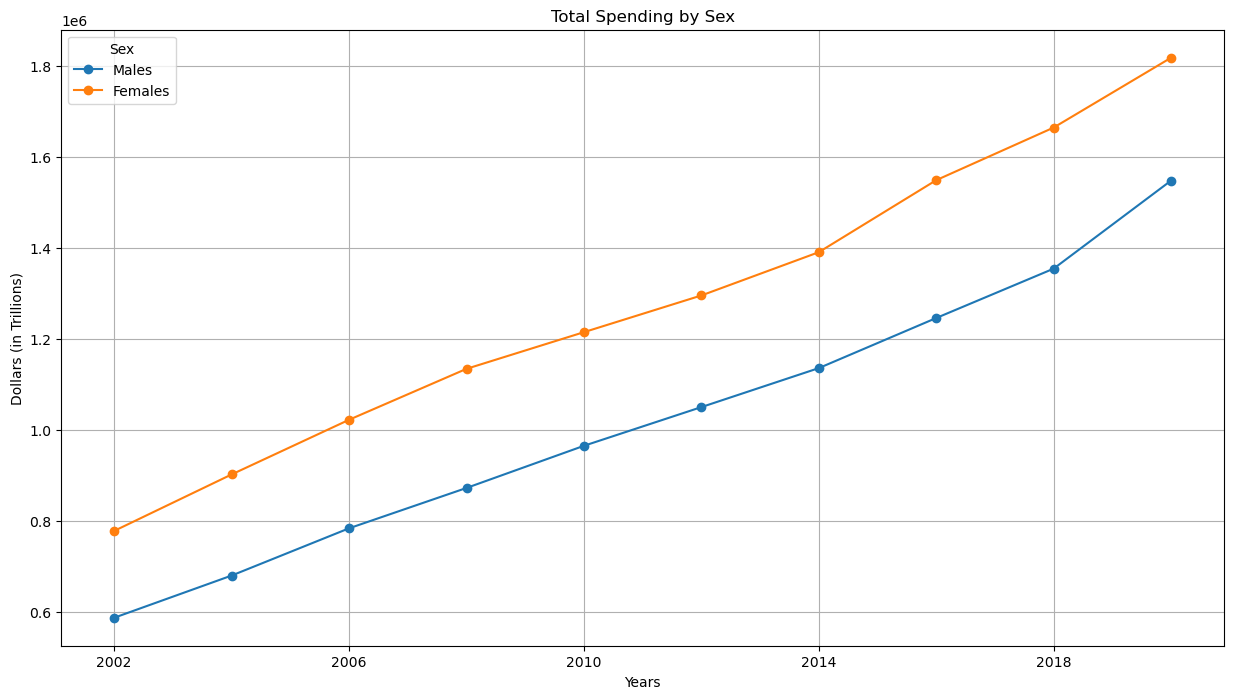

In [14]:
#Creating the line graph for the dataframe
flip_sex_index.plot(kind='line', marker='o', figsize=(15,8))

plt.title("Total Spending by Sex")
plt.xlabel("Years")
plt.ylabel("Dollars (in Trillions)")
plt.grid(True)

#Exporting the plot to a PNG
plt.savefig("figures/total_spending_sex.png")

plt.show()

# Total Spending by Age Group

In [16]:
# Using the health dataset dataframe to show the total healthcare spending by age group
raw_data_df.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [17]:
# Filtering the dataset to get total healthcare spending by payer, serive, and sex.
age_totals = raw_data_df[(raw_data_df["Payer"]== "Total") & (raw_data_df["Service"]== "Total Personal Health Care") & (raw_data_df["Sex"]== "Total")]
age_totals.head() 

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533


In [18]:
# Filtering the health data to remove total spending in the age group column.
totals_age_group = age_totals[age_totals["Age Group"] != "Total"]
totals_age_group

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
1139,Total,Total Personal Health Care,85+,Total,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [19]:
# Removing payer and service columns
final_age_groups = totals_age_group.loc[:,["Age Group", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_age_groups

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1135,0-18,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,19-44,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,45-64,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,65-84,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
1139,85+,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [20]:
# Setting Age Group as the index for line graph plotting
age_group = final_age_groups.set_index("Age Group")
age_group

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
19-44,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
45-64,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
65-84,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
85+,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [21]:
# Flipping the axis of the data to create the line graph
age_group_flip = age_group.T
age_group_flip

Age Group,0-18,19-44,45-64,65-84,85+
2002,178448,331965,382688,368617,103762
2004,202201,372438,464516,422462,120763
2006,232989,417377,549813,467308,138963
2008,250925,437974,627062,533554,157638
2010,270828,474803,683349,578098,173383
2012,287823,502438,734607,633981,187353
2014,288509,553743,815413,673445,195974
2016,297986,637259,904083,752617,203613
2018,308435,692849,948257,849605,220623
2020,324242,759960,1039838,1003533,239402


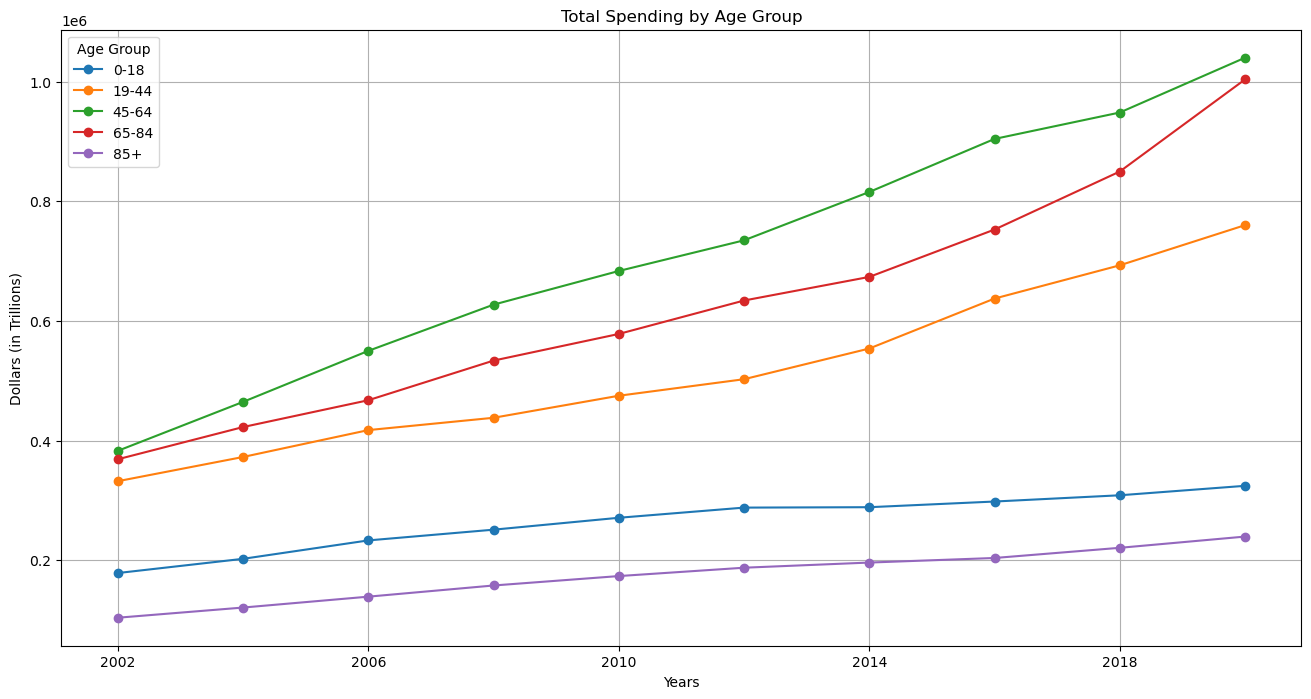

In [22]:
# Creating a line chart from the dataframe to show total spending by age group 
age_group_flip.plot(kind='line', marker='o', figsize=(16,8))

plt.title("Total Spending by Age Group")
plt.xlabel("Years")
plt.ylabel("Dollars (in Trillions)")
plt.grid(True)

plt.savefig("figures/total_spending_age.png")

plt.show()

# Total Spending by Sex and Age Group

In [24]:
# Using the health dataset dataframe to show the total healthcare spending by sex and age group
raw_data_df.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [25]:
# Filtering the dataset to get total spending by payer and total personal care service
age_sex = raw_data_df[(raw_data_df["Payer"]== "Total") & (raw_data_df["Service"]== "Total Personal Health Care")]
age_sex.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533


In [26]:
# Filtering down the data to total spending per age group and sex
age_sex_group = age_sex[(age_sex["Age Group"] != "Total") & (age_sex["Sex"] != "Total")]
age_sex_group

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,Total,Total Personal Health Care,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,Total,Total Personal Health Care,19-44,Males,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,Total,Total Personal Health Care,45-64,Males,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,Total,Total Personal Health Care,65-84,Males,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,Total,Total Personal Health Care,85+,Males,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,Total,Total Personal Health Care,85+,Females,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [27]:
# Removing the payer and service columns
final_age_sex_groups = age_sex_group.loc[:,["Age Group", "Sex", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_age_sex_groups

,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,19-44,Males,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,45-64,Males,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,65-84,Males,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,85+,Males,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889
1147,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,85+,Females,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


## Spending for Females by Age Group

In [29]:
# Filtering the datafame down to only spending for females by age group
female_age_groups = final_age_sex_groups[final_age_sex_groups["Sex"] != "Males"]
female_age_groups

,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1147,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,85+,Females,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [30]:
# Removing the sex column now that the information is only for females so we can have the age group as our key
final_female_age_group = female_age_groups.loc[:, ["Age Group","2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_female_age_group 

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1147,0-18,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,19-44,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,45-64,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,65-84,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,85+,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [31]:
# Setting age group as our key to prepapre the dataframe for plotting
final_female_age = final_female_age_group.set_index("Age Group")
final_female_age 

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
19-44,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
45-64,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
65-84,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
85+,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [32]:
# Flipping our dataframe to prepapre for plotting

flip_final_female_age = final_female_age.T
flip_final_female_age 

Age Group,0-18,19-44,45-64,65-84,85+
2002,85543,206495,200289,209361,76528
2004,96672,234299,247272,236079,88032
2006,108695,262160,292000,259063,100624
2008,115940,280048,329676,297283,111594
2010,126545,296160,354531,317264,120653
2012,137233,310934,373297,344705,129665
2014,137644,338761,413856,367161,133562
2016,139529,391206,475154,406104,137319
2018,144977,431197,487918,454100,146800
2020,150846,461702,523367,527153,155513


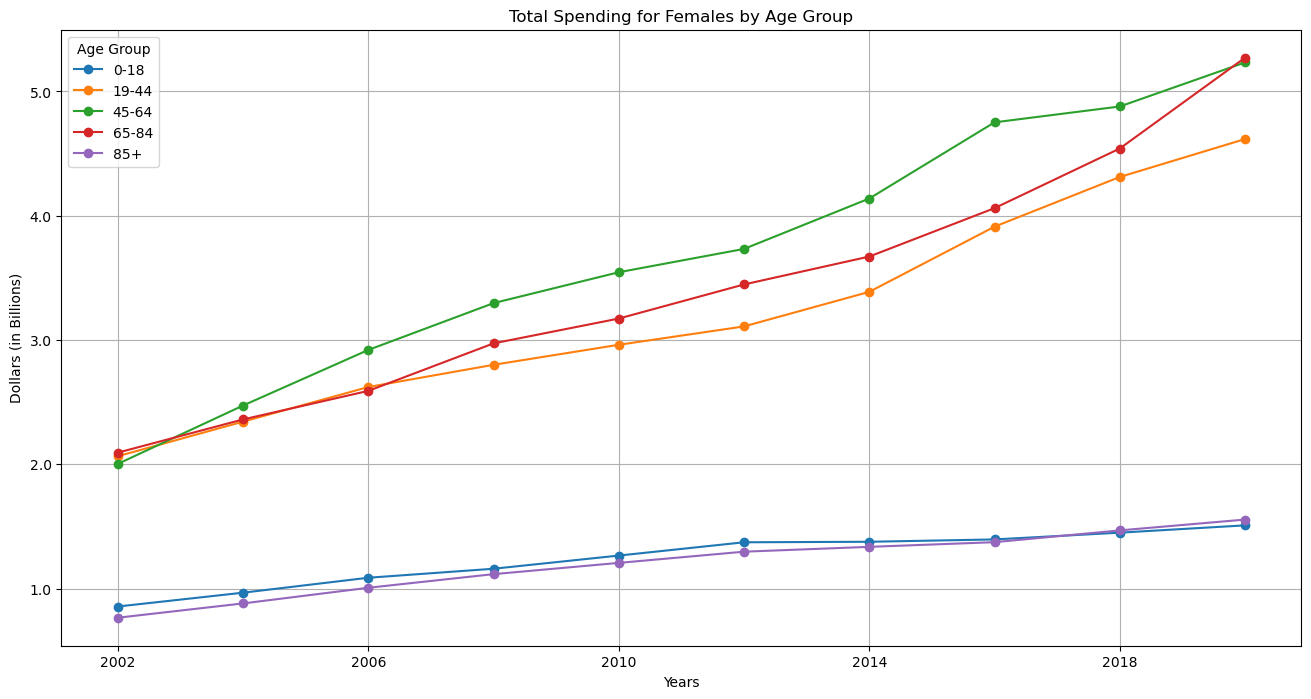

In [33]:
# Using the dataframe to plot total spending for females by age group in a line chart

flip_final_female_age.plot(kind='line', marker='o', figsize=(16,8))

plt.title("Total Spending for Females by Age Group")
plt.xlabel("Years")
plt.ylabel("Dollars (in Billions)")
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 100000)))

plt.savefig("figures/total_spending_sex_age_female.png")

plt.show()

## Spending for Males by Age Group

In [35]:
# Filtering the datafame down to only spending for males by age group
male_age_group = final_age_sex_groups[final_age_sex_groups["Sex"] != "Females"]
male_age_group

,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,19-44,Males,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,45-64,Males,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,65-84,Males,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,85+,Males,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889


In [36]:
# Removing the sex column now that the information is only for males so we can have the age group as our key
final_male_age_group = male_age_group.loc[:, ["Age Group","2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_male_age_group

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,0-18,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,19-44,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,45-64,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,65-84,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,85+,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889


In [37]:
# Setting age group as our key to prepapre the dataframe for plotting
final_male_age = final_male_age_group.set_index("Age Group")
final_male_age 

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
19-44,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
45-64,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
65-84,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
85+,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889


In [38]:
# Flipping our dataframe to prepapre for plotting

flip_final_male_age = final_male_age.T
flip_final_male_age

Age Group,0-18,19-44,45-64,65-84,85+
2002,92905,125471,182399,159257,27234
2004,105530,138139,217244,186383,32731
2006,124294,155217,257813,208246,38340
2008,134985,157926,297386,236271,46045
2010,144282,178643,328818,260835,52729
2012,150591,191504,361310,289276,57688
2014,150865,214982,401557,306285,62413
2016,158457,246053,428929,346513,66293
2018,163458,261652,460339,395505,73824
2020,173397,298258,516471,476379,83889


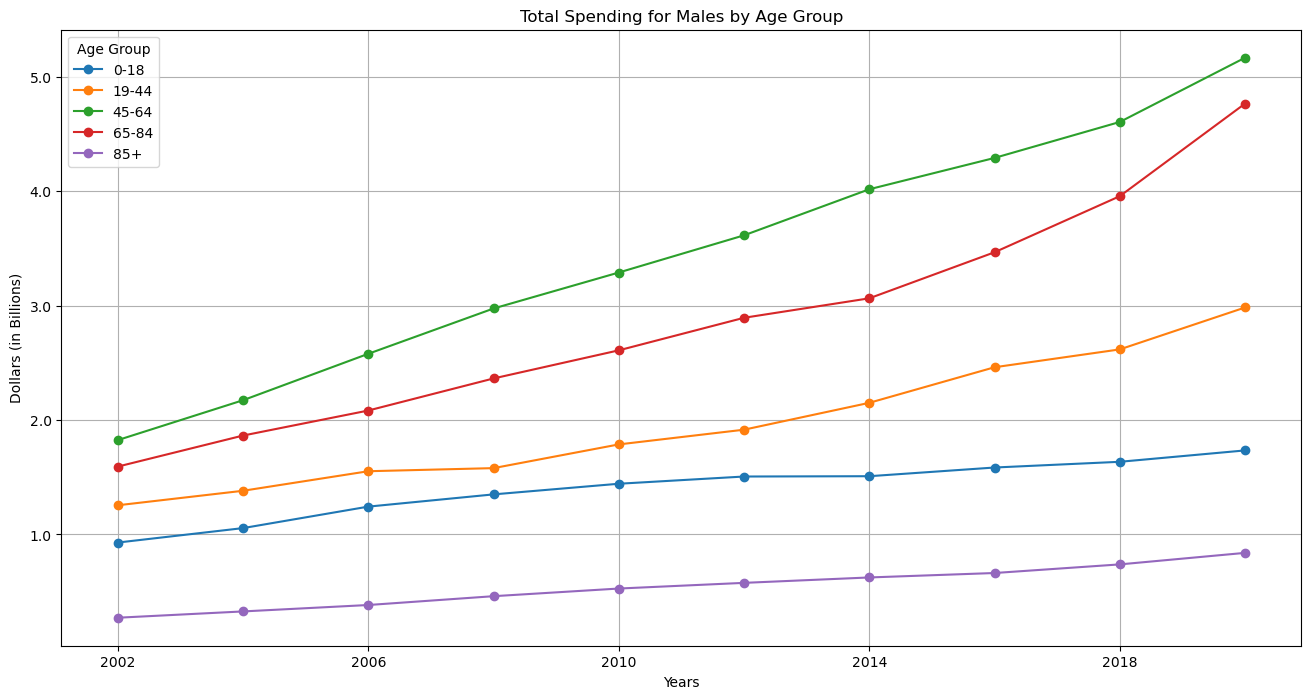

In [39]:
# Using the datframe to plot total spending for males by age group in a line chart

flip_final_male_age.plot(kind='line', marker='o', figsize=(16,8))

plt.title("Total Spending for Males by Age Group")
plt.xlabel("Years")
plt.ylabel("Dollars (in Billions)")
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 100000)))

plt.savefig("figures/total_spending_sex_age_male.png")

plt.show()

## Analyzing Dental and Prescription Drug Spending

In [41]:
total_df = raw_data_df[raw_data_df["Payer"] == "Total"]
total_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153


In [42]:
persc_drugs = total_df[total_df["Service"] == "Prescription Drugs"]
persc_drugs

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1026,Total,Prescription Drugs,Total,Total,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887
1032,Total,Prescription Drugs,Total,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1033,Total,Prescription Drugs,0-18,Males,7272,8555,9951,10489,10495,11050,11581,11390,10708,10919
1034,Total,Prescription Drugs,19-44,Males,13464,15726,18434,17630,20108,19110,23737,27274,28365,29360
1035,Total,Prescription Drugs,45-64,Males,28978,37034,43824,50364,48743,53212,59621,62206,63082,64177


In [43]:
persc_drugs[persc_drugs["Sex"] == "Total"]

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1026,Total,Prescription Drugs,Total,Total,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


## Dental services exploration and charting

In [45]:
dental_services_filtered = raw_data_df[raw_data_df["Service"] == "Dental Services"]

In [46]:
dental_total_removed = dental_services_filtered[dental_services_filtered["Payer"] != "Total"]

In [47]:
dental_total_age_removed = dental_total_removed[dental_total_removed["Age Group"] != "Total"]

In [48]:
dental_total_age_sex_removed = dental_total_age_removed[dental_total_age_removed["Sex"] == "Total"]

In [49]:
dental_total_age_sex_removed["Payer"].value_counts()

Payer
Medicaid                     5
Medicare                     5
Other Payers and Programs    5
Out-of-Pocket                5
Private health Insurance     5
Name: count, dtype: int64

In [50]:
medicaid = dental_total_age_sex_removed[dental_total_age_sex_removed["Payer"] == "Medicaid"]

In [51]:
medicaid_df = medicaid.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
medicaid_df

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1,0-18,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,19-44,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,45-64,433,440,515,733,974,1071,1543,1952,2088,2117
4,65-84,207,202,211,291,358,369,400,543,728,738
5,85+,48,47,51,80,118,127,135,169,218,221


In [52]:
# Set the index to 'Age Group' column for easier plotting
medicaid_reset_index_df = medicaid_df.set_index('Age Group', inplace=False)
medicaid_reset_index_df

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
19-44,937,984,1077,1405,1929,1938,2480,3029,3270,3315
45-64,433,440,515,733,974,1071,1543,1952,2088,2117
65-84,207,202,211,291,358,369,400,543,728,738
85+,48,47,51,80,118,127,135,169,218,221


In [53]:
# Rotate the df
medicaid_rotated_df = medicaid_reset_index_df.T
medicaid_rotated_df

Age Group,0-18,19-44,45-64,65-84,85+
2002,2085,937,433,207,48
2004,2591,984,440,202,47
2006,2938,1077,515,211,51
2008,3737,1405,733,291,80
2010,5012,1929,974,358,118
2012,4989,1938,1071,369,127
2014,5216,2480,1543,400,135
2016,6195,3029,1952,543,169
2018,6340,3270,2088,728,218
2020,6246,3315,2117,738,221


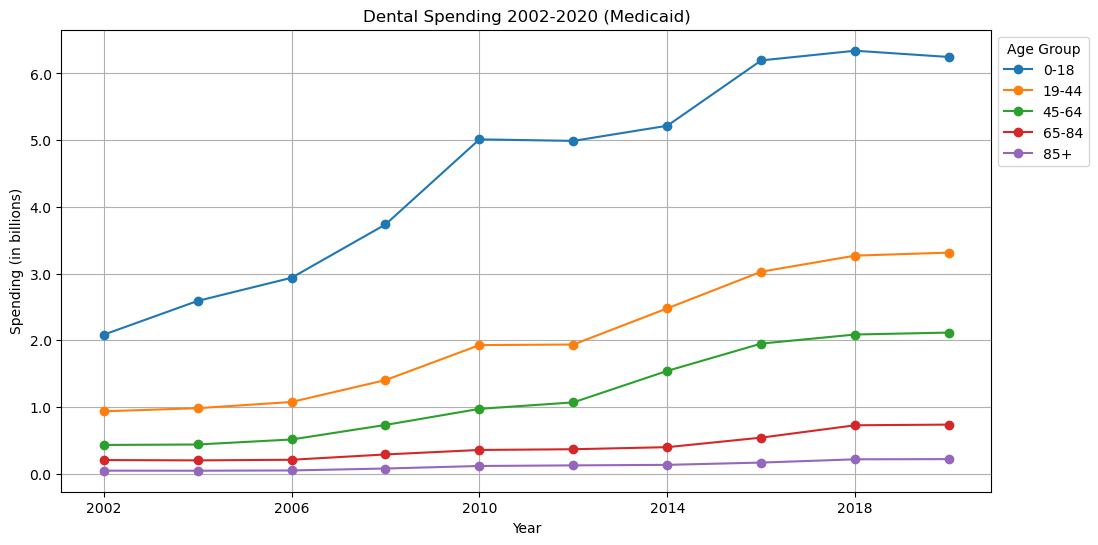

In [54]:
# charting
medicaid_rotated_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Dental Spending 2002-2020 (Medicaid)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig("Figures/medicaid_dental_spending.png")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))
plt.show()

# Dental spending by age group

In [56]:
dental_total = dental_services_filtered[dental_services_filtered["Payer"] == "Total"]
dental_total

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
95,Total,Dental Services,85+,Total,779,1092,1354,1940,1992,2192,2489,2568,3231,3372
96,Total,Dental Services,Total,Males,32525,36222,39970,45283,46589,47811,50791,56863,62504,62026
97,Total,Dental Services,0-18,Males,8790,10784,11705,13150,13031,13769,13615,16039,17453,17222
98,Total,Dental Services,19-44,Males,8666,9009,9079,10173,9998,9759,10790,12913,13039,13138
99,Total,Dental Services,45-64,Males,10503,10768,12608,14387,14813,14391,14735,14735,16223,14521


In [57]:
dental_tot_ages = dental_total[dental_total["Age Group"] != "Total"]

In [58]:
dental_total_filtered = dental_tot_ages[dental_tot_ages["Sex"] == "Total"]

In [59]:
dental_loc = dental_total_filtered.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
dental_loc

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
91,0-18,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,19-44,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,45-64,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,65-84,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
95,85+,779,1092,1354,1940,1992,2192,2489,2568,3231,3372


In [60]:
dental_reset_index = dental_loc.set_index("Age Group", inplace=False)
dental_reset_index

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
19-44,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
45-64,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
65-84,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832
85+,779,1092,1354,1940,1992,2192,2489,2568,3231,3372


In [61]:
dental_total_rotated = dental_reset_index.T
dental_total_rotated

Age Group,0-18,19-44,45-64,65-84,85+
2002,19093,20814,23759,9191,779
2004,22843,21996,25209,11051,1092
2006,25787,22659,28661,13304,1354
2008,28007,25224,32575,15016,1940
2010,28676,24490,33728,17013,1992
2012,30925,25225,31366,19993,2192
2014,30497,26693,32698,22316,2489
2016,33178,30148,34524,25779,2568
2018,33966,32340,37762,30090,3231
2020,33643,32316,37152,32832,3372


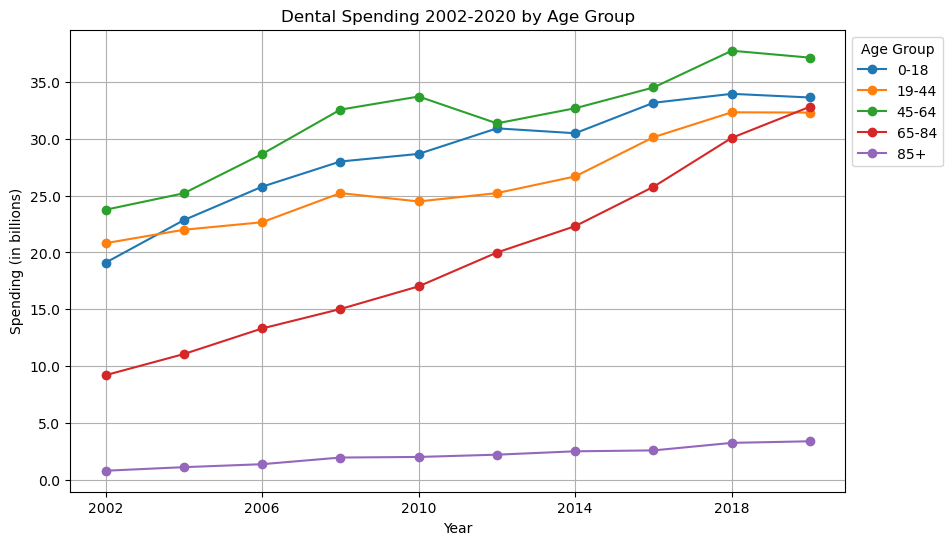

In [62]:
dental_total_rotated.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Dental Spending 2002-2020 by Age Group')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)
ax = plt.gca()

# Set the formatter for the y-axis to display values divided by 10000
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/dental_spending.png")
plt.show()

In [63]:
pvt_dent = dental_services_filtered[dental_services_filtered["Payer"] == "Private health Insurance"]
pvt_ageout = pvt_dent[pvt_dent["Age Group"] != "Total"]
pvt_df = pvt_ageout[pvt_ageout["Sex"] == "Total"]

In [64]:
pvt_dent_col = pvt_df.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
pvt_dent_col

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
73,0-18,8588,10657,11683,12182,11914,14143,13395,13852,14118,12782
74,19-44,11187,11893,12010,12545,12995,13393,14288,15337,16451,15454
75,45-64,12159,12520,13814,15877,16941,14881,15953,16635,18605,16869
76,65-84,2967,3662,3952,4172,5573,6667,8253,9225,10479,10413
77,85+,130,253,256,501,496,521,675,559,852,676


In [65]:
pvt_dent_total_index = pvt_dent_col.set_index("Age Group", inplace=False)
pvt_dent_total_index

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,8588,10657,11683,12182,11914,14143,13395,13852,14118,12782
19-44,11187,11893,12010,12545,12995,13393,14288,15337,16451,15454
45-64,12159,12520,13814,15877,16941,14881,15953,16635,18605,16869
65-84,2967,3662,3952,4172,5573,6667,8253,9225,10479,10413
85+,130,253,256,501,496,521,675,559,852,676


In [66]:
pvt_dent_total_rot = pvt_dent_total_index.T
pvt_dent_total_rot

Age Group,0-18,19-44,45-64,65-84,85+
2002,8588,11187,12159,2967,130
2004,10657,11893,12520,3662,253
2006,11683,12010,13814,3952,256
2008,12182,12545,15877,4172,501
2010,11914,12995,16941,5573,496
2012,14143,13393,14881,6667,521
2014,13395,14288,15953,8253,675
2016,13852,15337,16635,9225,559
2018,14118,16451,18605,10479,852
2020,12782,15454,16869,10413,676


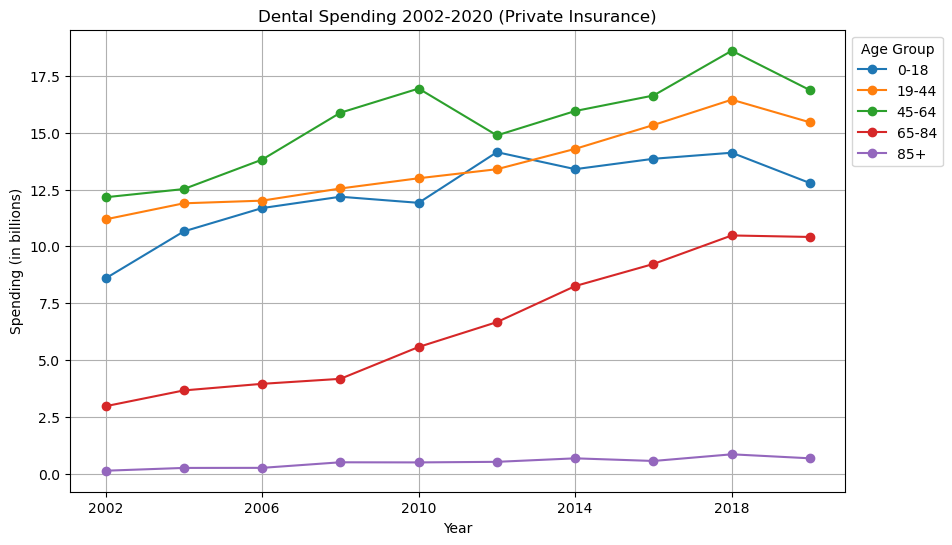

In [67]:
pvt_dent_total_rot.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Dental Spending 2002-2020 (Private Insurance)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)

ax = plt.gca()

# Set the formatter for the y-axis to display values divided by 10000
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/dental_spending_pvt.png")
plt.show()

## Perscription drug exploration and charting

In [69]:
pres_filtered_df = total_df[(total_df["Service"] == "Prescription Drugs") & (total_df["Age Group"] != "Total") & (total_df["Sex"] == "Total") & (total_df["Payer"] == "Total")]
pres_filtered_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1027,Total,Prescription Drugs,0-18,Total,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,Total,Prescription Drugs,19-44,Total,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,Total,Prescription Drugs,45-64,Total,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,Total,Prescription Drugs,65-84,Total,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,Total,Prescription Drugs,85+,Total,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


In [70]:
pres_columns_df = pres_filtered_df.loc[:,["Age Group", "2002", "2004",	"2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
pres_columns_df

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1027,0-18,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
1028,19-44,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
1029,45-64,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
1030,65-84,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
1031,85+,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


In [71]:
pres_indexreset_df = pres_columns_df.set_index("Age Group")
pres_indexreset_df

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,12801,15350,17813,17783,17985,18847,20090,19792,19028,19587
19-44,37535,43487,49398,46965,48245,47452,53539,61627,64853,70887
45-64,68711,87408,102013,108211,110997,111382,125759,135138,133603,137530
65-84,35583,42925,50490,61827,65878,69012,79672,84338,93452,107738
85+,5181,6467,8385,9539,10267,10304,11581,12429,13234,14887


In [72]:
pres_rotation_df = pres_indexreset_df.T
pres_rotation_df

Age Group,0-18,19-44,45-64,65-84,85+
2002,12801,37535,68711,35583,5181
2004,15350,43487,87408,42925,6467
2006,17813,49398,102013,50490,8385
2008,17783,46965,108211,61827,9539
2010,17985,48245,110997,65878,10267
2012,18847,47452,111382,69012,10304
2014,20090,53539,125759,79672,11581
2016,19792,61627,135138,84338,12429
2018,19028,64853,133603,93452,13234
2020,19587,70887,137530,107738,14887


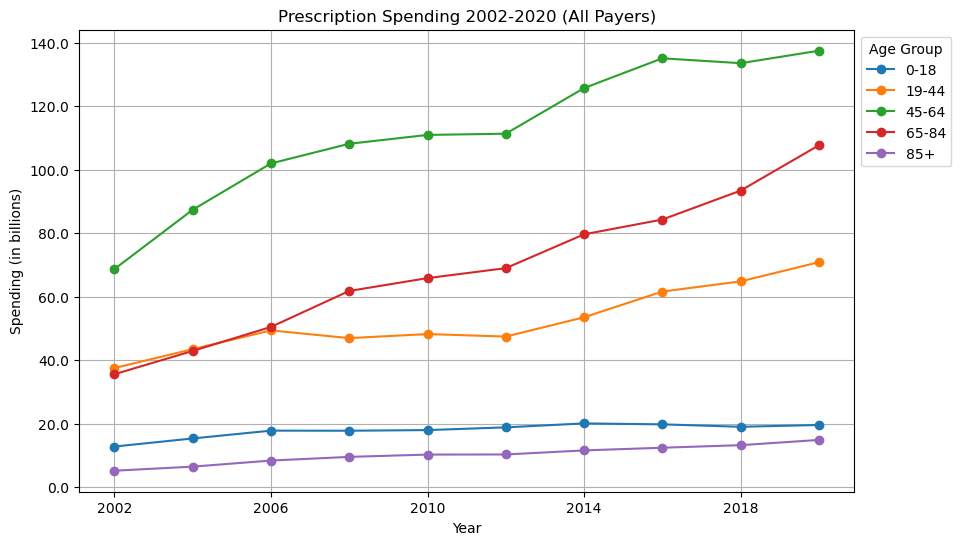

In [73]:
pres_rotation_df.plot(kind="line", marker="o", figsize=(10, 6))
plt.title('Prescription Spending 2002-2020 (All Payers)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.grid(True)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/pres_spending.png")
plt.show()

In [74]:
persc_filtered = persc_drugs[(persc_drugs["Age Group"] == "Total") & (persc_drugs["Sex"] != "Total")]
persc_filtered

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1032,Total,Prescription Drugs,Total,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1038,Total,Prescription Drugs,Total,Females,95231,115493,133248,136654,142930,140098,156203,170044,173183,190094


In [75]:
persc_col = persc_filtered.loc[:,["Sex", "2002", "2004","2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
persc_col

,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1032,Males,64582,80145,94851,107670,110442,116898,134439,143278,150987,160536
1038,Females,95231,115493,133248,136654,142930,140098,156203,170044,173183,190094


In [76]:
# reset index
persc_col_index = persc_col.set_index("Sex", inplace=False)

In [77]:
# rotate
persc_rotated = persc_col_index.T
persc_rotated

Sex,Males,Females
2002,64582,95231
2004,80145,115493
2006,94851,133248
2008,107670,136654
2010,110442,142930
2012,116898,140098
2014,134439,156203
2016,143278,170044
2018,150987,173183
2020,160536,190094


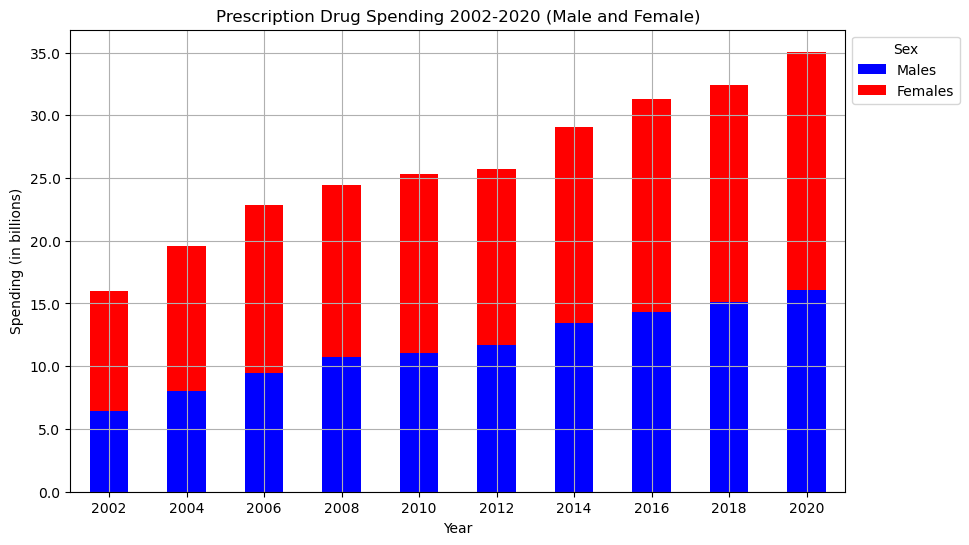

In [78]:
# Plotting the DataFrame as a stacked bar graph
persc_rotated.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])

# Set the title and axis labels
plt.title('Prescription Drug Spending 2002-2020 (Male and Female)')
plt.xlabel('Year')
plt.ylabel('Spending (in billions)')

# Add legend and adjust its position
plt.legend(title='Sex', bbox_to_anchor=(1, 1))

# Display grid lines
plt.grid(True)

# Set x-axis ticks to show every other value
plt.xticks(rotation=0, ha='center')

ax = plt.gca()

# Set the formatter for the y-axis to display values divided by 10000
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 10000)))

# Save the figure as a PNG file
plt.savefig("Figures/drug_spending_yoy_gender.png")

# Show the plot
plt.show()

## Prescription stat analysis

In [80]:
raw_data_df.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [81]:
pres_stat = raw_data_df[raw_data_df["Service"] == "Prescription Drugs"]
pres_stat

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
936,Medicaid,Prescription Drugs,Total,Total,27523,35852,19122,19242,20423,21049,25266,29328,30430,34419
937,Medicaid,Prescription Drugs,0-18,Total,4558,6155,5916,6062,6280,7118,7543,7741,7437,8419
938,Medicaid,Prescription Drugs,19-44,Total,7127,9038,5814,5803,6294,6437,8226,10239,10784,11868
939,Medicaid,Prescription Drugs,45-64,Total,8041,10870,6280,6348,6810,6336,8219,9186,9353,10166
940,Medicaid,Prescription Drugs,65-84,Total,6077,7718,935,865,861,921,1052,1596,2108,2977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Total,Prescription Drugs,0-18,Females,5530,6795,7863,7294,7490,7796,8509,8402,8321,8668
1040,Total,Prescription Drugs,19-44,Females,24071,27761,30965,29335,28137,28342,29802,34352,36488,41527
1041,Total,Prescription Drugs,45-64,Females,39733,50375,58189,57847,62254,58170,66138,72932,70520,73353
1042,Total,Prescription Drugs,65-84,Females,22146,25885,30279,35555,38060,38926,44255,46508,49689,57626


In [82]:
pres_filtered = pres_stat[(pres_stat["Payer"] != "Total") & (pres_stat["Age Group"] == "Total") & (pres_stat["Sex"] == "Total")]
pres_filtered

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
936,Medicaid,Prescription Drugs,Total,Total,27523,35852,19122,19242,20423,21049,25266,29328,30430,34419
954,Medicare,Prescription Drugs,Total,Total,1863,2707,38570,48795,56295,63942,79471,89879,97228,111635
972,Other Payers and Programs,Prescription Drugs,Total,Total,9445,12613,14356,14340,14568,14056,14530,14671,15214,16486
990,Out-of-Pocket,Prescription Drugs,Total,Total,45461,52609,56485,54284,47742,45117,48553,50301,47416,48324
1008,Private health Insurance,Prescription Drugs,Total,Total,75520,91856,99566,107665,114343,112832,122823,129145,133881,139765


In [83]:
pres_mean = pres_filtered.mean(numeric_only=True)
pres_mean_df = pd.DataFrame(pres_mean)
pres_mean_df

,0
2002,31962.4
2004,39127.4
2006,45619.8
2008,48865.2
2010,50674.2
2012,51399.2
2014,58128.6
2016,62664.8
2018,64833.8
2020,70125.8


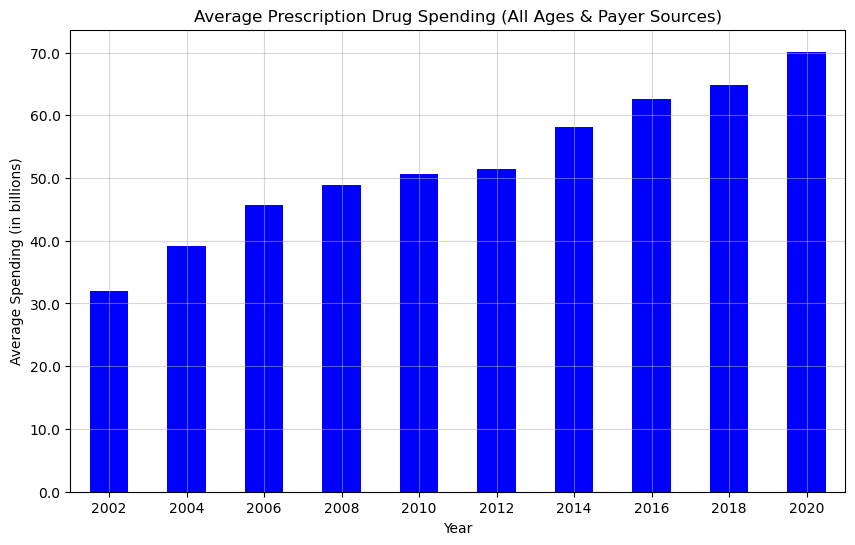

In [84]:
pres_mean_df.plot(kind="bar", figsize=(10,6), color="blue")
plt.title("Average Prescription Drug Spending (All Ages & Payer Sources)")
plt.xlabel("Year")
plt.ylabel("Average Spending (in billions)")
plt.grid(True, alpha=0.5)
plt.legend().remove()
plt.xticks(rotation=0, ha='center')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))

plt.savefig("Figures/drug_spending_mean.png")

plt.show()

## Total Spending by Category

In [86]:
total_spending_df = raw_data_df[(raw_data_df["Payer"] == "Total") & (raw_data_df["Service"] != "Total") &(raw_data_df["Service"] != "Total Personal Health Care") & (raw_data_df["Age Group"] == "Total") & (raw_data_df["Sex"] == "Total")]
total_spending_df

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
198,Total,Durable Medical Equipment,Total,Total,29641,33210,39637,42642,39955,43259,46558,50037,54119,55120
306,Total,Home Health Care,Total,Total,36465,44641,52052,62165,70525,78076,84670,93707,105552,125003
414,Total,Hospital Care,Total,Total,486482,565327,651209,721630,808795,877968,940526,1035398,1122658,1267833
522,Total,Nursing Care Facilities and Continuing Care Re...,Total,Total,94500,105073,115897,130419,140451,147341,152551,161954,167664,196890
630,Total,Other Health Residential and Personal Care,Total,Total,76010,88775,100850,111941,127402,138099,151316,174231,189934,210672
702,Total,Other Nondurable Medical Products,Total,Total,27905,32724,38666,45309,51820,61213,65516,71876,77601,85367
810,Total,Other Professional Services,Total,Total,43338,50211,55264,64486,69889,76429,82351,92073,104494,117702
918,Total,Physician and Clinical Services,Total,Total,337691,384594,433010,481475,512353,557122,598262,676762,736188,818446
1026,Total,Prescription Drugs,Total,Total,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629


In [87]:
total_columns = total_spending_df.loc[:,["Service", "2002", "2004","2006",	"2008",	"2010",	"2012",	"2014",	"2016",	"2018",	"2020"]]
total_columns

,Service,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Dental Services,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
198,Durable Medical Equipment,29641,33210,39637,42642,39955,43259,46558,50037,54119,55120
306,Home Health Care,36465,44641,52052,62165,70525,78076,84670,93707,105552,125003
414,Hospital Care,486482,565327,651209,721630,808795,877968,940526,1035398,1122658,1267833
522,Nursing Care Facilities and Continuing Care Re...,94500,105073,115897,130419,140451,147341,152551,161954,167664,196890
630,Other Health Residential and Personal Care,76010,88775,100850,111941,127402,138099,151316,174231,189934,210672
702,Other Nondurable Medical Products,27905,32724,38666,45309,51820,61213,65516,71876,77601,85367
810,Other Professional Services,43338,50211,55264,64486,69889,76429,82351,92073,104494,117702
918,Physician and Clinical Services,337691,384594,433010,481475,512353,557122,598262,676762,736188,818446
1026,Prescription Drugs,159812,195638,228099,244324,253371,256996,290642,313323,324170,350629


In [88]:
total_indexreset = total_columns.set_index("Service")
total_indexreset

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Service,,,,,,,,,,
Dental Services,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
Durable Medical Equipment,29641,33210,39637,42642,39955,43259,46558,50037,54119,55120
Home Health Care,36465,44641,52052,62165,70525,78076,84670,93707,105552,125003
Hospital Care,486482,565327,651209,721630,808795,877968,940526,1035398,1122658,1267833
Nursing Care Facilities and Continuing Care Retirement Communities,94500,105073,115897,130419,140451,147341,152551,161954,167664,196890
Other Health Residential and Personal Care,76010,88775,100850,111941,127402,138099,151316,174231,189934,210672
Other Nondurable Medical Products,27905,32724,38666,45309,51820,61213,65516,71876,77601,85367
Other Professional Services,43338,50211,55264,64486,69889,76429,82351,92073,104494,117702
Physician and Clinical Services,337691,384594,433010,481475,512353,557122,598262,676762,736188,818446


In [89]:
total_indexreset["Mean"] = total_indexreset.mean(numeric_only=True, axis=1)

In [90]:
total_indexreset

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,Mean
Service,,,,,,,,,,,
Dental Services,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313,108354.5
Durable Medical Equipment,29641,33210,39637,42642,39955,43259,46558,50037,54119,55120,43417.8
Home Health Care,36465,44641,52052,62165,70525,78076,84670,93707,105552,125003,75285.6
Hospital Care,486482,565327,651209,721630,808795,877968,940526,1035398,1122658,1267833,847782.6
Nursing Care Facilities and Continuing Care Retirement Communities,94500,105073,115897,130419,140451,147341,152551,161954,167664,196890,141274.0
Other Health Residential and Personal Care,76010,88775,100850,111941,127402,138099,151316,174231,189934,210672,136923.0
Other Nondurable Medical Products,27905,32724,38666,45309,51820,61213,65516,71876,77601,85367,55799.7
Other Professional Services,43338,50211,55264,64486,69889,76429,82351,92073,104494,117702,75623.7
Physician and Clinical Services,337691,384594,433010,481475,512353,557122,598262,676762,736188,818446,553590.3


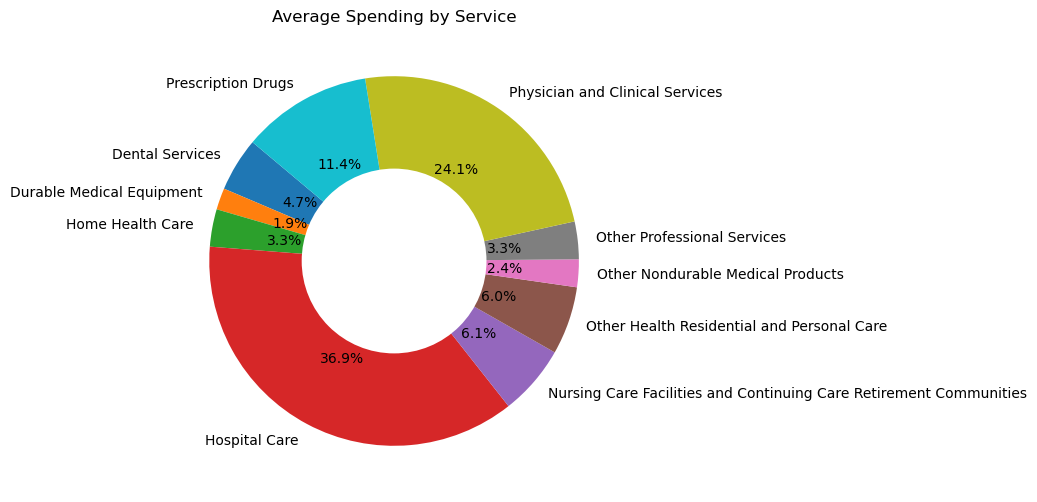

In [171]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_indexreset["Mean"], labels=total_indexreset.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Spending by Service')
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("Figures/average_spending_doughnut.png")
plt.show()

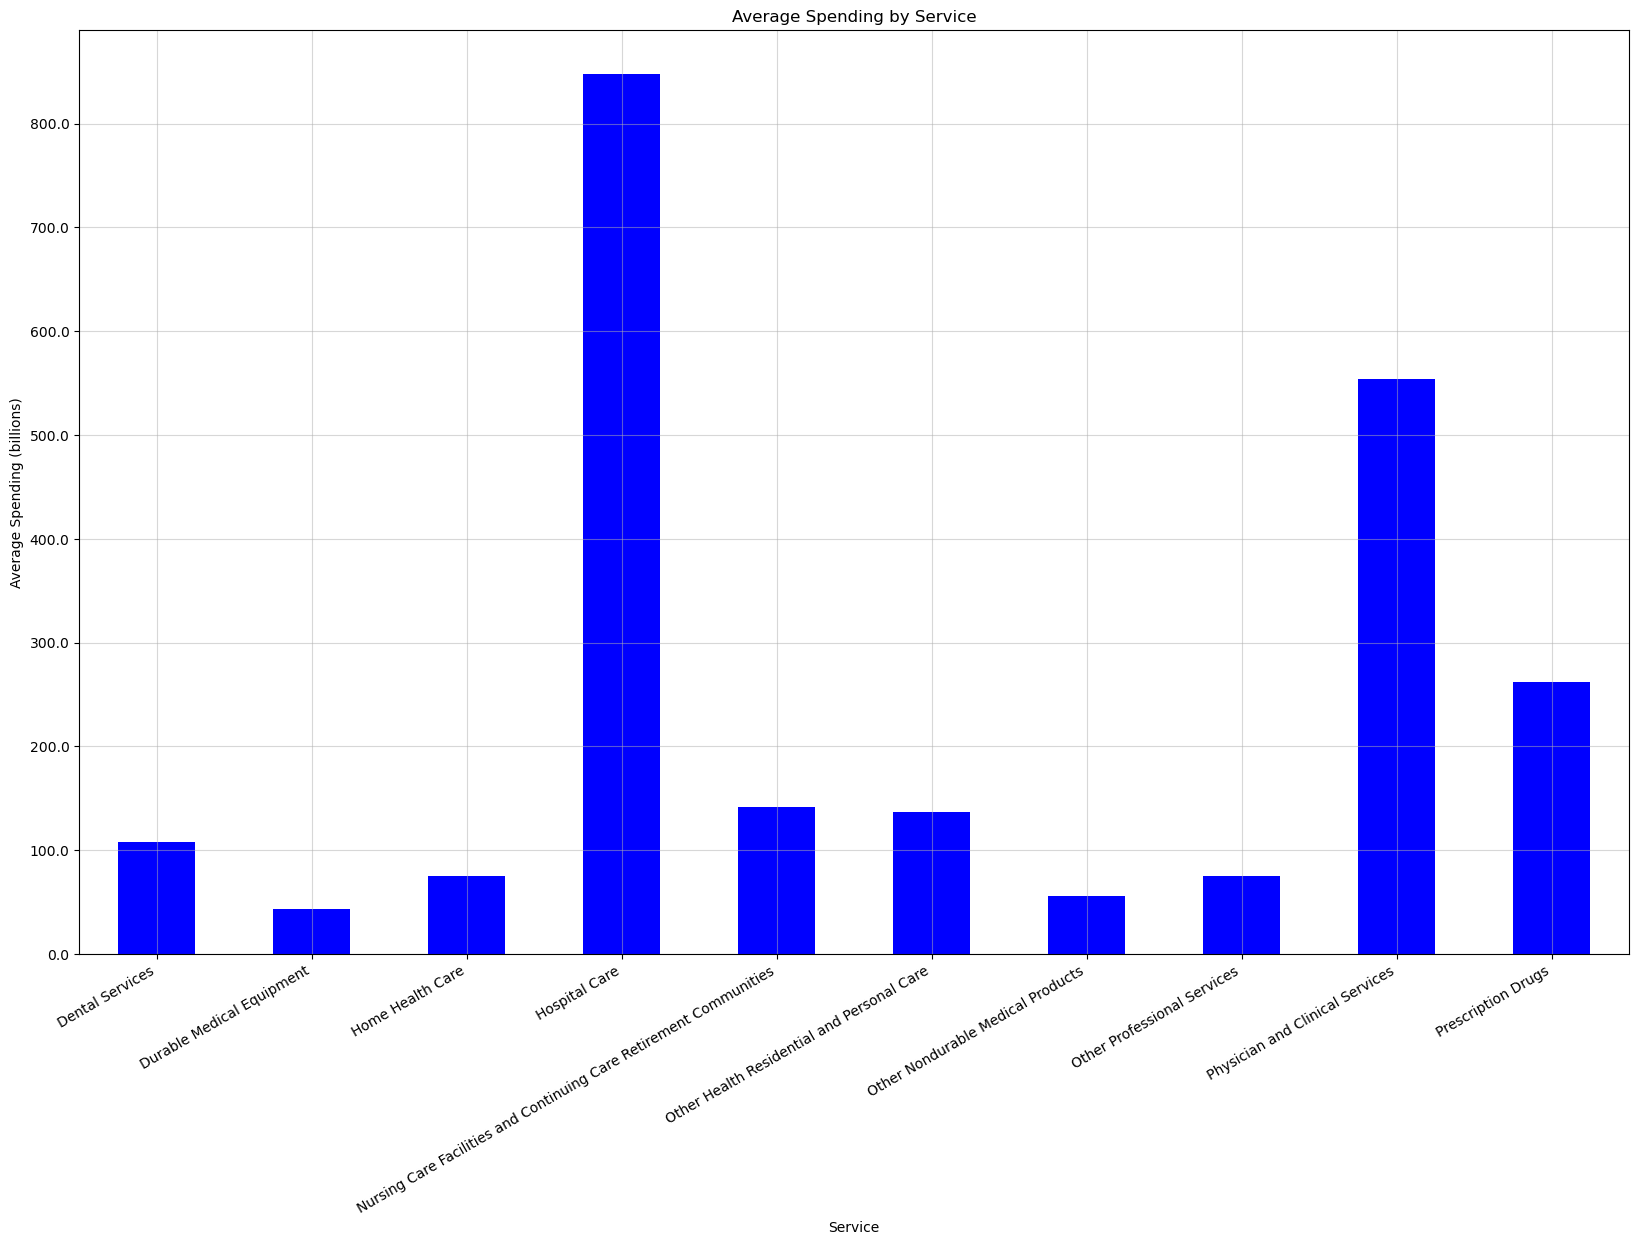

In [175]:
# Create a bar chart
plt.figure(figsize=(20, 12))
total_indexreset["Mean"].plot(kind='bar', color='blue')
plt.xlabel('Service')
plt.ylabel('Average Spending (billions)')
plt.title('Average Spending by Service')
plt.xticks(rotation=30, ha="right")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 1000)))
plt.grid(True, alpha=.5)
plt.savefig("Figures/average_spending_bar.png")
plt.show()

# Brandon's code